In [3]:
# Import IBKR data fetcher
import asyncio
import importlib

# Reload config and ibkr_data_async to pick up any changes (important if you modified config.py)
import config
importlib.reload(config)
import ibkr_data_async
importlib.reload(ibkr_data_async)
from ibkr_data_async import DataFetcherAsync
from config import IBKR_HOST, IBKR_PORT, IBKR_CLIENT_ID

# Verify the port being used
print(f"Connecting to IBKR at {IBKR_HOST}:{IBKR_PORT}")
print(f"Client ID: {IBKR_CLIENT_ID}")

IBKR_PORT = 4001

# Set your tickers and years here
tickers = ["TLT"]
years = 30
force_refresh = True  # Set to True to bypass cache and re-download

# Initialize and connect (explicitly pass port to avoid caching issues)
fetcher = DataFetcherAsync(
    host=IBKR_HOST,
    port=IBKR_PORT,  # This will use the reloaded config value
    client_id=IBKR_CLIENT_ID
)

# Connect to IBKR (make sure TWS/Gateway is running!)
await fetcher.connect()
print("Connected to IBKR!")

# Fetch data for multiple tickers
all_data = await fetcher.fetch_all_tickers_data(
    tickers=tickers,
    years=years,
    force_refresh=force_refresh,
    max_concurrent=5
)

# Display results
for ticker, df in all_data.items():
    if df is not None:
        print(f"\n{ticker}:")
        print(f"  Shape: {df.shape}")
        print(f"  Date range: {df.index.min()} to {df.index.max()}")
        print(f"  First few rows:")
        print(df.head())

# Disconnect when done
fetcher.ib.disconnect()
print("\nDisconnected from IBKR")


Error 321, reqId -1: Error validating request.-'ct' : cause - The API interface is currently in Read-Only mode.


Connecting to IBKR at 127.0.0.1:7496
Client ID: 1


Error 321, reqId -1: Error validating request.-'b3' : cause - The API interface is currently in Read-Only mode.
open orders request timed out
completed orders request timed out


Connected to IBKR!

TLT:
  Shape: (2467, 8)
  Date range: 0 to 2466
  First few rows:
         date    open    high     low   close      volume     average  \
0  2016-02-03   98.84  100.12   98.56   98.59  11245927.0   99.192602   
1  2016-02-04   98.80   99.08   98.25   99.06   8126689.0   98.768050   
2  2016-02-05   98.54   99.40   98.31   99.18   6572599.0   98.892873   
3  2016-02-08   99.95  101.42   99.92  101.31  10281167.0  100.943205   
4  2016-02-09  101.74  101.75  100.91  101.42  11896455.0  101.400889   

   barCount  
0     53110  
1     35600  
2     32506  
3     48403  
4     53670  

Disconnected from IBKR


In [45]:
from data_cleaning import Data
import pickle_utils
importlib.reload(pickle_utils)
from pickle_utils import save_pickle_data

data_processor = Data(
    tickers=["SPY", "TLT", "AAPL", "NVDA", "TSM"],
    dfs=all_data,
    years=20
)

# clean_data() returns a dictionary: {'SPY': DataFrame, ...}
cleaned_data = data_processor.clean_data()

# Access the DataFrame using the ticker as key
SPY_df = cleaned_data["SPY"]

# Or if you have multiple tickers, you can access each one:
# cleaned_data["AAPL"], cleaned_data["NVDA"], etc.

# Now SPY_df is a DataFrame with all the cleaned data
print(f"SPY DataFrame shape: {SPY_df.shape}")
print(f"\nColumns: {SPY_df.columns.tolist()}")
print(f"\nFirst few rows:")
print(SPY_df.head())
print(f"\nAccess returns column:")
print(SPY_df['returns'].head())

# Update the SPY pickle file with cleaned data
save_pickle_data("SPY", SPY_df)
print("\n✅ Updated SPY pickle file with cleaned data!")

SPY DataFrame shape: (5028, 13)

Columns: ['open', 'high', 'low', 'close', 'volume', 'average', 'barCount', 'returns', 'log_returns', 'day_of_month', 'day_of_week', 'month', 'year']

First few rows:
                            open   high    low  close      volume    average  \
date                                                                           
2005-11-28 00:00:00+00:00  89.06  90.77  87.88  88.34  48378500.0  88.535158   
2005-11-29 00:00:00+00:00  88.64  88.87  88.23  88.25  46506700.0  88.530959   
2005-11-30 00:00:00+00:00  88.30  88.55  87.49  87.80  46989000.0  88.123633   
2005-12-01 00:00:00+00:00  88.20  88.90  88.17  88.65  58830000.0  88.593947   
2005-12-02 00:00:00+00:00  88.72  88.94  88.53  88.79  40659900.0  88.734621   

                           barCount   returns  log_returns  day_of_month  \
date                                                                       
2005-11-28 00:00:00+00:00     95504       NaN          NaN            28   
2005-11-29 0

/Users/shrey/Desktop/Research/data_cleaning.py:75: UserWarning: Ticker AAPL not found in data dictionary, skipping...
  warnings.warn(f"Ticker {ticker} not found in data dictionary, skipping...")
/Users/shrey/Desktop/Research/data_cleaning.py:75: UserWarning: Ticker NVDA not found in data dictionary, skipping...
  warnings.warn(f"Ticker {ticker} not found in data dictionary, skipping...")
/Users/shrey/Desktop/Research/data_cleaning.py:75: UserWarning: Ticker TSM not found in data dictionary, skipping...
  warnings.warn(f"Ticker {ticker} not found in data dictionary, skipping...")


In [46]:
# Load existing pickle data (no IBKR connection needed)
import importlib
from json import load
import pickle_utils
importlib.reload(pickle_utils)  # Reload to pick up the new function
from pickle_utils import load_all_pickle_data

# Load all tickers from pickle files

tickers = ["SPY"]
all_data = load_all_pickle_data(tickers = tickers)

# Or load single ticker:
# all_data = load_all_pickle_data(ticker="SPY")


In [48]:

import matplotlib.pyplot as plt
import seaborn as sns

all_data["SPY"].head()

,open,high,low,close,volume,average,barCount,returns,log_returns,day_of_month,day_of_week,month,year
date,,,,,,,,,,,,,
2005-11-28 00:00:00+00:00,89.06,90.77,87.88,88.34,48378500.0,88.535158,95504,NaN,NaN,28,0,11,2005
2005-11-29 00:00:00+00:00,88.64,88.87,88.23,88.25,46506700.0,88.530959,88036,-0.001019,-0.001019,29,1,11,2005
2005-11-30 00:00:00+00:00,88.30,88.55,87.49,87.80,46989000.0,88.123633,96874,-0.005099,-0.005112,30,2,11,2005
2005-12-01 00:00:00+00:00,88.20,88.90,88.17,88.65,58830000.0,88.593947,107144,0.009681,0.009635,1,3,12,2005
2005-12-02 00:00:00+00:00,88.72,88.94,88.53,88.79,40659900.0,88.734621,77811,0.001579,0.001578,2,4,12,2005


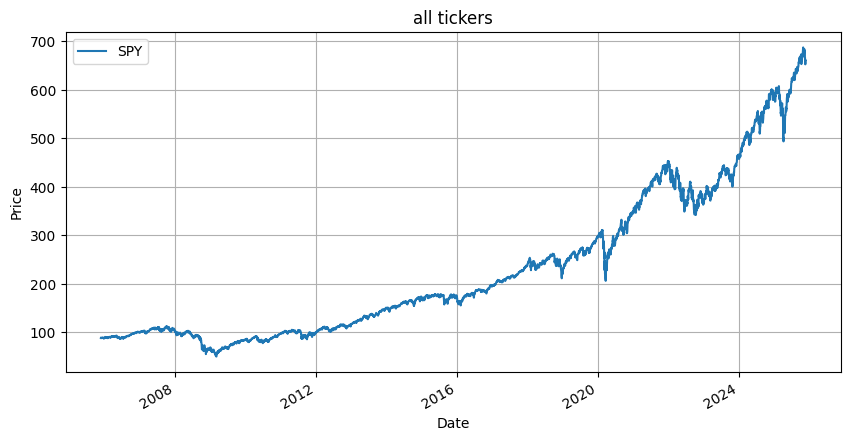

In [49]:
fig, ax = plt.subplots(figsize=(10,5))

for ticker, df in all_data.items():
    ax.plot(df.index, df['close'], label = ticker)

ax.set_title("all tickers")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)
fig.autofmt_xdate()
plt.show()

So what we are doing is calculating the log

In [ ]:
import numpy as np
spy = all_data["SPY"]

spy = spy.assign(
    trend = np.log(spy["close"]/spy["close"].shift(252)),
    next_day_returns = np.log(spy["close"].shift(-1)/spy["close"])
    ).dropna()

spy.head()

,open,high,low,close,volume,average,barCount,returns,log_returns,day_of_month,day_of_week,month,year,trend,next_day_returns
date,,,,,,,,,,,,,,,
2006-11-28 00:00:00+00:00,97.99,98.65,97.59,98.61,88489700.0,98.318464,94094,0.004789,0.004778,28,1,11,2006,0.109980,0.008985
2006-11-29 00:00:00+00:00,98.87,99.62,98.83,99.50,76521800.0,99.260555,89651,0.009025,0.008985,29,2,11,2006,0.119984,0.000804
2006-11-30 00:00:00+00:00,99.55,99.99,99.07,99.58,78341500.0,99.494483,97863,0.000804,0.000804,30,3,11,2006,0.125900,-0.000904
2006-12-01 00:00:00+00:00,99.62,99.71,98.51,99.49,109804100.0,99.059236,127235,-0.000904,-0.000904,1,4,12,2006,0.115361,0.006812
2006-12-04 00:00:00+00:00,99.42,100.34,99.41,100.17,80550300.0,99.946035,82649,0.006835,0.006812,4,0,12,2006,0.120595,0.004184


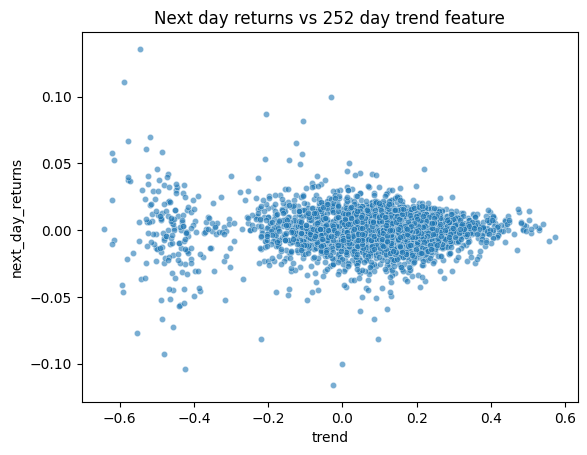

In [56]:
import seaborn as sns
sns.scatterplot(data=spy, x="trend", y="next_day_returns", s=20, alpha=0.6)
plt.title("Next day returns vs 252 day trend feature")
plt.show()

In [58]:
from features import information_coeff

ic_score, p_value = information_coeff(spy, 'next_day_returns', 'trend')

print(f"ic_score: {ic_score}")
print(f"p_value: {p_value}")

--- Research Results ---
Spearman IC (Rank): -0.0147
P-Value: 0.3107
------------------------
Pearson IC (Linear):-0.0103
ic_score: -0.014672456802411556
p_value: 0.31073735579092887


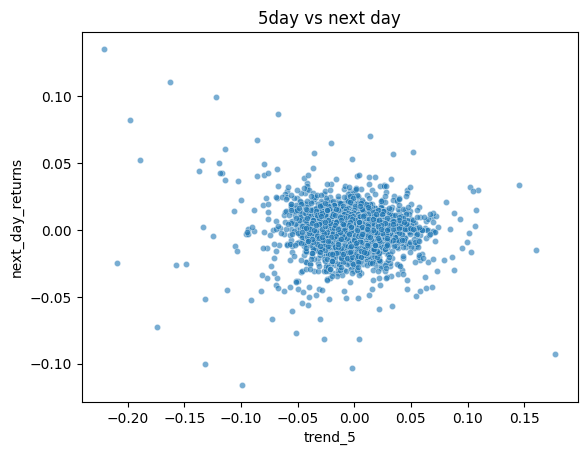

--- Research Results ---
Spearman IC (Rank): -0.0468
P-Value: 0.0012
------------------------
Pearson IC (Linear):-0.0748


In [60]:
spy = spy.assign(
    trend_5 = np.log(spy["close"]/spy["close"].shift(5)),
    next_day_returns = np.log(spy["close"].shift(-1)/spy["close"])
    ).dropna()

sns.scatterplot(data=spy, x="trend_5", y="next_day_returns", s=20, alpha=0.6)
plt.title("5day vs next day")
plt.show()


ic_5, p_5 = information_coeff(spy, "trend_5", "next_day_returns")



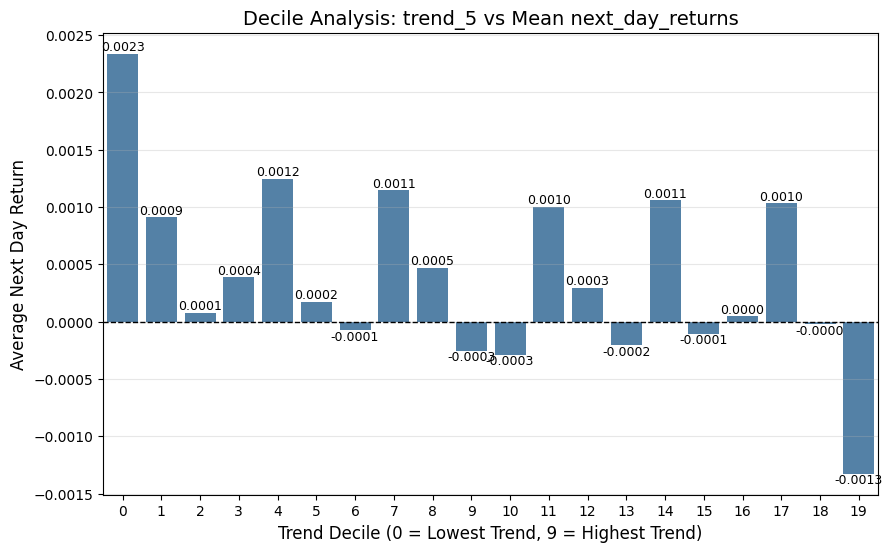

In [64]:
import features
importlib.reload(features)
from features import plot_decile_analysis

plot_decile_analysis(spy)

/Users/shrey/Desktop/Research/features.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_perf.index, y=yearly_perf['strat_edge'], palette=colors)


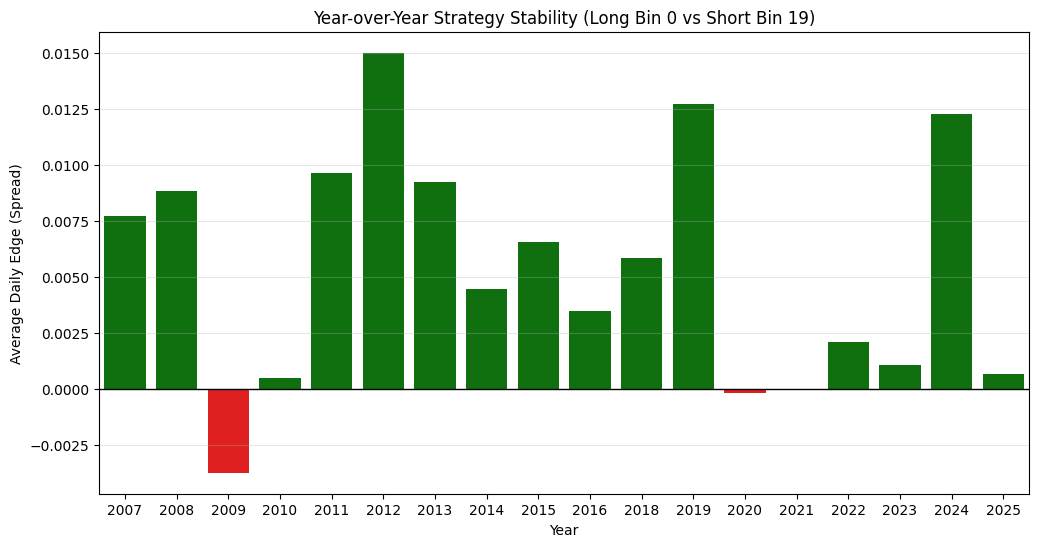

--- Annual Strategy Edge ---
bin   strat_edge
year            
2007    0.007685
2008    0.008841
2009   -0.003756
2010    0.000461
2011    0.009611
2012    0.014991
2013    0.009231
2014    0.004447
2015    0.006558
2016    0.003451
2018    0.005818
2019    0.012707
2020   -0.000214
2021         NaN
2022    0.002078
2023    0.001045
2024    0.012250
2025    0.000667


In [66]:
import features
importlib.reload(features)
from features import plot_yearly_analysis

plot_yearly_analysis(spy, 'trend_5', 'next_day_returns')